# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [103]:
# Import relevant packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA
aqi = pd.read_csv('c4_epa_air_quality.csv',index_col = 0)

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [3]:
# Explore your DataFrame `aqi`.
aqi.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [4]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        260 non-null    object 
 1   state_name        260 non-null    object 
 2   county_name       260 non-null    object 
 3   city_name         260 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    260 non-null    object 
 6   units_of_measure  260 non-null    object 
 7   arithmetic_mean   260 non-null    float64
 8   aqi               260 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.3+ KB


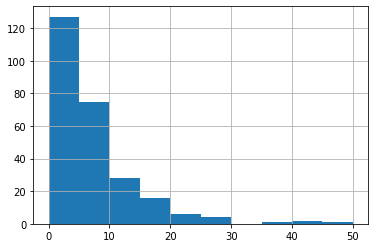

In [18]:
aqi['aqi'].hist();

In [69]:
aqi[aqi['aqi']>30]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
25,2018-01-01,Nevada,Clark,Las Vegas,Sunrise Acres,Carbon monoxide,Parts per million,1.805263,41
132,2018-01-01,California,Los Angeles,Compton,Compton,Carbon monoxide,Parts per million,1.742105,40
155,2018-01-01,Arizona,Maricopa,Phoenix,SOUTH PHOENIX,Carbon monoxide,Parts per million,1.394737,36
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,1.921053,50


In [49]:
rre_states = aqi.loc[aqi['state_name'].isin(['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas'])]
print(rre_states.state_name.value_counts())
print('=======================================')
print(rre_states.state_name.value_counts(normalize=True).round(2))

California      66
Ohio            12
Florida         12
Pennsylvania    10
Texas           10
Michigan         9
Name: state_name, dtype: int64
California      0.55
Ohio            0.10
Florida         0.10
Pennsylvania    0.08
Texas           0.08
Michigan        0.08
Name: state_name, dtype: float64


**Question:** What time range does this data cover?

**Answer:**  
The data was collected on 2018-01-01. This is the only date available.

**Question:** What are the minimum and maximum AQI values observed in the dataset?

**Answer:**  
The range of aqi is (0,50)

**Question:** Are all states equally represented in the dataset?

**Answer:**  
The states were RRE operates have the below representative percentages among the data:
* California  55%
* Ohio  10%
* Florida  10%
* Pennsylvania  8%
* Texas  8%
* Michigan  8%

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about descriptive statisics](https://www.coursera.org/learn/the-power-of-statistics/lecture/jVRS4/measures-of-central-tendency).
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `pandas` or `numpy` to explore the `aqi` DataFrame.
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use any of the following functions:
- `pandas`: `describe()`,`value_counts()`,`shape()`
- `numpy`: `unique()`,`mean()`
    
</details>

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [56]:
# Summarize the mean AQI for RRE states.
rre_ttl_mean = round(rre_states.aqi.mean(),2)
print(rre_ttl_mean)
# Create a list of RRE states.
# Subset `aqi` to only consider these states.
# Find the mean aqi for each of the RRE states.
rre_per_state_mean = {}
rre_state_names = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']
for i in rre_states['state_name']:
    if i in rre_state_names:
        rre_per_state_mean[i] = round(rre_states.loc[rre_states['state_name'] == i]['aqi'].mean(),2)
rre_per_state_mean

8.7


{'Ohio': 3.33,
 'Pennsylvania': 2.9,
 'California': 12.12,
 'Texas': 2.7,
 'Florida': 5.5,
 'Michigan': 8.11}

In [78]:
# Second more easy way
rre_states.groupby('state_name')['aqi'].mean().round(2)

state_name
California      12.12
Florida          5.50
Michigan         8.11
Ohio             3.33
Pennsylvania     2.90
Texas            2.70
Name: aqi, dtype: float64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset your DataFrame to only include those states in which RRE operates. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Define a list consisting of the states in which RRE operates and use that list to subset your DataFrame. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `isin.()` to subset your DataFrame by the list of RRE states.
    
</details>

### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [65]:
# Import seaborn as sns.
'''
It is good practise to import all the packages that your code will require, at the bigenning of the notebook.
'''


'\nIt is good practise to import all the packages that your code will require, at the bigenning of the notebook.\n'

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

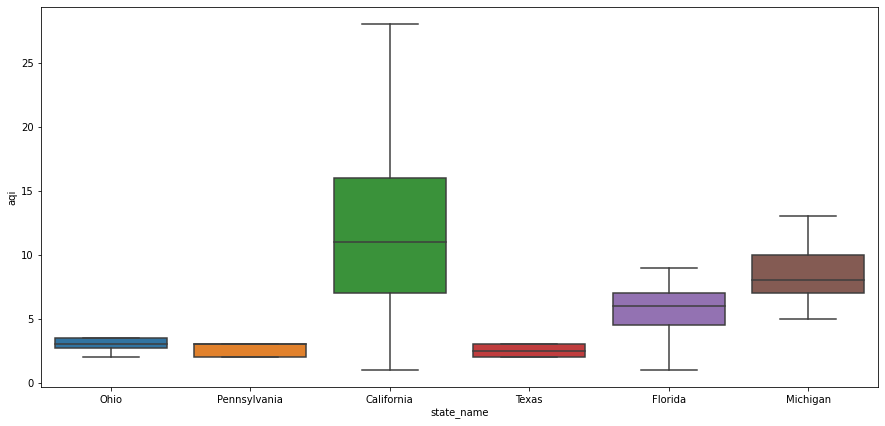

In [68]:
plt.figure(figsize=(15,7))
sns.boxplot(data=rre_states,x='state_name',y='aqi',showfliers = False);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the boxplot visual for this purpose.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Reference [Seaborn's boxplot visualization documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Assign `state_name` to the x argument and `aqi` to the y.
    
</details>

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

**Answer:**  
It is obviouse from the above visualization that the state most affected from the new policy will be the state of California.Another affected state will be the Michigan as the boxplot ranges above 10.

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider the mean AQI for the RRE states, as well as the distribution in the boxplots relative to the policy limit (10).
    
</details>

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [113]:
# Find the mean aqi for your state.
california_mean = rre_per_state_mean['California']
california_mean

12.12

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Reference what you've previously learned to recall what a [sample statistic](https://www.coursera.org/learn/the-power-of-statistics/supplement/cdOx7/construct-a-confidence-interval-for-a-small-sample-size) is.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Calculate the mean for your highest AQI state to arrive at your sample statistic.
    
</details>

<details>
 <summary><h4><strong>Hint 3</strong></h4></summary>

Call the `mean()` function within `pandas` on your DataFrame.
    
</details>

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [106]:
# Input your confidence level here:
conf_level = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [115]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.

# Next, calculate your standard error.

# Lastly, use the preceding result to calculate your margin of error.
z_score = 1.96
std_error = round(rre_states.loc[rre_states['state_name']=='California']['aqi'].std()/np.sqrt(len(rre_states.loc[rre_states['state_name']=='California']['aqi'])),2)
margin_of_error = z_score * std_error
margin_of_error

1.764

### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [102]:
# Calculate your confidence interval (upper and lower limits).
lower_limit = california_mean - margin_of_error
upper_limit = california_mean + margin_of_error
print((lower_limit.round(2),upper_limit.round(2)))

(10.36, 13.88)


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a confidence interval](https://www.coursera.org/learn/the-power-of-statistics/lecture/3jbsX/construct-a-confidence-interval-for-a-proportion).
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Identify the sample mean from your prior work. Then use the margin of error to construct your upper and lower limits.  
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the margin of error from the sample mean to construct your lower limit, and add the margin of error to your sample mean to construct your upper limit.
    
</details>

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [104]:
# Import stats from scipy.
"You need to learn that it is good practise to import all the required packages at the begenning of your notebook"

'You need to learn that it is good practise to import all the required packages at the begenning of your notebook'

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [123]:
stats.norm.interval(alpha = 0.95,loc=california_mean,scale=std_error)

(10.356032413913951, 13.883967586086047)

# Considerations

**What are some key takeaways that you learned from this lab?**

**Answer:**  
The takeaways of this lab was the process of filtering your data to isolate only the states of your interest, then plotting them into a line of box plots, and finaly the creation of the confidence interval.

**What findings would you share with others?**

**Answer:**  
Worth-mention finding is that the California state will be most effected by the new policy with an aqi mean of 12. By constructing the confidence level for California, we can expect that there is 95% probability that the constructed interval contain the population mean. The interval range is (10.35,13.88).

**What would you convey to external stakeholders?**  
* I would recomend emphasis on the state of California base on the finding that the state mean is 12, therefore above the stated boundary of 10 for a state to be eligible for the new policy.
* I would provide evidence of uncertainty due to the random sampling of data, as we know from the constructed confidence interval that there is a 95% confidence level that the population mean falls within 10.35 and 13.88 aqi points. The lower limit falls above 10 which is another key finding for the nececity of action angainst air polution in the California state.
* I would also recomend further analysis for the state of Michigan as it seems that could be another state that should be under the new policy.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.